In [1]:
# Add relevant Jupyter notebook extensions 
%load_ext autoreload
%autoreload

In [2]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['/Users/liboting/Documents/schoolwork/Year3/B1_EngiComputation/scientific_computing/b1-coding-practical-mt24', '/Users/liboting/Documents/schoolwork/Year3/B1_EngiComputation/scientific_computing/b1-coding-practical-mt24/notebooks', '/Users/liboting/anaconda3/envs/b1_sc/lib/python310.zip', '/Users/liboting/anaconda3/envs/b1_sc/lib/python3.10', '/Users/liboting/anaconda3/envs/b1_sc/lib/python3.10/lib-dynload', '', '/Users/liboting/anaconda3/envs/b1_sc/lib/python3.10/site-packages']


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

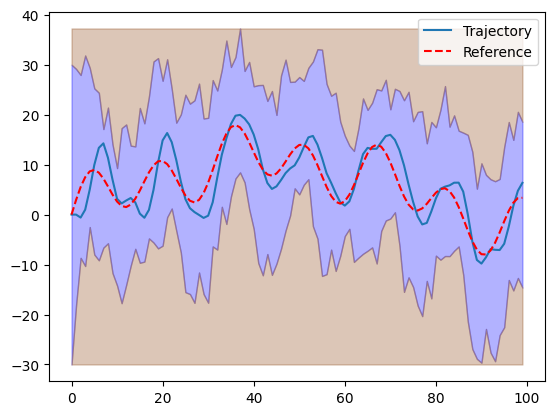

In [3]:
# Import relevant modules
from uuv_mission import *

sub = Submarine()
controller = Controller()
# Instantiate your controller (depending on your implementation)
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("mission.csv") # You must implement this method in the Mission class

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)